In [2]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

In [3]:
#df.to_csv('XIACF.csv') --> for saving the data into csv format
df = pd.read_csv('XIACF.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,XIACF,2018-08-21 00:00:00+00:00,2.30,2.30,2.30,2.30,8784200,2.30,2.30,2.30,2.30,8784200,0.0,1.0
1,XIACF,2018-08-22 00:00:00+00:00,2.70,3.50,2.27,2.30,116872,2.70,3.50,2.27,2.30,116872,0.0,1.0
2,XIACF,2018-08-23 00:00:00+00:00,2.35,3.00,2.20,2.68,7406506,2.35,3.00,2.20,2.68,7406506,0.0,1.0
3,XIACF,2018-08-24 00:00:00+00:00,2.22,2.60,2.22,2.60,4898137,2.22,2.60,2.22,2.60,4898137,0.0,1.0
4,XIACF,2018-08-27 00:00:00+00:00,2.35,2.65,2.23,2.30,105011,2.35,2.65,2.23,2.30,105011,0.0,1.0


In [4]:
df.shape

(762, 14)

In [5]:
df_close = df.reset_index()['close']
df_close

0      2.3000
1      2.7000
2      2.3500
3      2.2200
4      2.3500
        ...  
757    3.3400
758    3.1800
759    3.2100
760    3.2399
761    3.2000
Name: close, Length: 762, dtype: float64

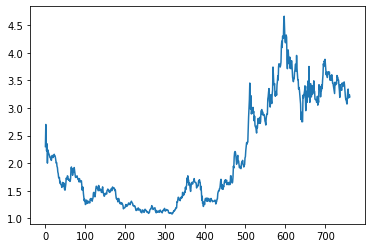

In [6]:
plt.plot(df_close)